# SETTINGS

In [1]:
########## LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import os
import time
import datetime
import random
import multiprocessing
import pickle
import warnings
import gc
from tqdm import tqdm
import importlib

from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [2]:
########## SETTINGS

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('dark_background')
%matplotlib inline
gc.enable()

# DATA IMPORT

In [3]:
# read data
df_train = pd.read_csv('../data/prepared/df_v14.csv',      compression = 'gzip')
df_test  = pd.read_csv('../data/prepared/df_test_v14.csv', compression = 'gzip')
print(df_train.shape)
print(df_test.shape)
df_train.head()

(1381116, 476)
(10463, 476)


,day_of_year,days_since_last_order,itemID,mean_price_last_1,mean_price_last_35,mean_price_test,order__abs_energy,order__absolute_sum_of_changes,"order__agg_autocorrelation__f_agg_""mean""__maxlag_40","order__agg_autocorrelation__f_agg_""median""__maxlag_40","order__agg_autocorrelation__f_agg_""var""__maxlag_40","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""var""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""var""",order__approximate_entropy__m_2__r_0.1,order__approximate_entropy__m_2__r_0.3,order__approximate_entropy__m_2__r_0.5,order__approximate_entropy__m_2__r_0.7,order__approximate_entropy__m_2__r_0.9,order__ar_coefficient__coeff_0__k_10,order__ar_coefficient__coeff_10__k_10,order__ar_coefficient__coeff_1__k_10,order__ar_coefficient__coeff_2__k_10,order__ar_coefficient__coeff_3__k_10,order__ar_coefficient__coeff_4__k_10,order__ar_coefficient__coeff_5__k_10,order__ar_coefficient__coeff_6__k_10,order__ar_coefficient__coeff_7__k_10,order__ar_coefficient__coeff_8__k_10,order__ar_coefficient__coeff_9__k_10,"order__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",order__binned_entropy__max_bins_10,order__c3__lag_1,order__c3__lag_2,order__c3__lag_3,"order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.2__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.2","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.4","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.2","order__change_quantiles__f_agg_""mean""__isabs_Fa

In [4]:
df_test.head()

,day_of_year,days_since_last_order,itemID,mean_price_last_1,mean_price_last_35,mean_price_test,order__abs_energy,order__absolute_sum_of_changes,"order__agg_autocorrelation__f_agg_""mean""__maxlag_40","order__agg_autocorrelation__f_agg_""median""__maxlag_40","order__agg_autocorrelation__f_agg_""var""__maxlag_40","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""var""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","order__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""var""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""","order__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""var""",order__approximate_entropy__m_2__r_0.1,order__approximate_entropy__m_2__r_0.3,order__approximate_entropy__m_2__r_0.5,order__approximate_entropy__m_2__r_0.7,order__approximate_entropy__m_2__r_0.9,order__ar_coefficient__coeff_0__k_10,order__ar_coefficient__coeff_10__k_10,order__ar_coefficient__coeff_1__k_10,order__ar_coefficient__coeff_2__k_10,order__ar_coefficient__coeff_3__k_10,order__ar_coefficient__coeff_4__k_10,order__ar_coefficient__coeff_5__k_10,order__ar_coefficient__coeff_6__k_10,order__ar_coefficient__coeff_7__k_10,order__ar_coefficient__coeff_8__k_10,order__ar_coefficient__coeff_9__k_10,"order__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",order__binned_entropy__max_bins_10,order__c3__lag_1,order__c3__lag_2,order__c3__lag_3,"order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.2__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.2","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.4","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","order__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.2","order__change_quantiles__f_agg_""mean""__isabs_Fa

In [5]:
###### CORRECT COLNAMES

# drop foreign symbols
import re
df_train = df_train.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
df_test  = df_test.rename(columns  = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

# ensure that all colnames are unique
def uniquify(df_columns):
    seen = set()
    for item in df_columns:
        fudge = 1
        newitem = item
        while newitem in seen:
            fudge += 1
            newitem = "{}_{}".format(item, fudge)
        yield newitem
        seen.add(newitem)

df_train.columns = uniquify(df_train)
df_test.columns  = uniquify(df_test)

In [6]:
# extract target
y = df_train['target']
X = df_train.drop('target', axis = 1)
del df_train
print(X.shape, y.shape)

# format test data
X_test = df_test.drop('target', axis = 1)
del df_test
print(X_test.shape)

(1381116, 475) (1381116,)
(10463, 475)


In [7]:
# read items
items = pd.read_csv('../data/prepared/items_v1.csv', compression = 'gzip')
print(items.shape)

# keep existing IDs
items = items[items['itemID'].isin(X['itemID'].unique())]
print(items.shape)

(10463, 12)
(10463, 12)


# MODELING

In [8]:
##### IMPORT EVALUATION FUNCTIUONS

# profit function
import functions
importlib.reload(functions)
from functions import asymmetric_mse, asymmetric_mse_eval, profit, postprocess_preds

In [9]:
##### LIST RELEVANT FEATURES

drop_feats = ['itemID', 'day_of_year'] #+ ['category1', 'category2', 'category3'] + list(X.filter(like = '_all_').columns)
features = [var for var in X.columns if var not in drop_feats]
print(len(features), 'features')
features

473 features


['days_since_last_order',
 'mean_price_last_1',
 'mean_price_last_35',
 'mean_price_test',
 'order__abs_energy',
 'order__absolute_sum_of_changes',
 'order__agg_autocorrelation__f_agg_mean__maxlag_40',
 'order__agg_autocorrelation__f_agg_median__maxlag_40',
 'order__agg_autocorrelation__f_agg_var__maxlag_40',
 'order__agg_linear_trend__attr_intercept__chunk_len_10__f_agg_max',
 'order__agg_linear_trend__attr_intercept__chunk_len_10__f_agg_mean',
 'order__agg_linear_trend__attr_intercept__chunk_len_10__f_agg_min',
 'order__agg_linear_trend__attr_intercept__chunk_len_10__f_agg_var',
 'order__agg_linear_trend__attr_intercept__chunk_len_5__f_agg_max',
 'order__agg_linear_trend__attr_intercept__chunk_len_5__f_agg_mean',
 'order__agg_linear_trend__attr_intercept__chunk_len_5__f_agg_min',
 'order__agg_linear_trend__attr_intercept__chunk_len_5__f_agg_var',
 'order__agg_linear_trend__attr_rvalue__chunk_len_10__f_agg_max',
 'order__agg_linear_trend__attr_rvalue__chunk_len_10__f_agg_mean',
 'orde

In [10]:
########## MODELING PARAMETERS

### DATA PARTITIONING

# paritioning
num_folds = 7   # no. CV folds
test_days = 14  # no. days in the test set

# settings
seed  = 23


### TRAINING OPTIONS

# target transformation
target_transform = True

# train on positive sales only
train_on_positive = False

# two-stage model
two_stage = True

# use tuned meta-params
tuned_params = True


### CLASSIFIER PARAMETERS

# rounds and options
cores       = 4
stop_rounds = 100
verbose     = 100

# LGB parameters
lgb_params = {
    'boosting_type':    'goss',
    'objective':        asymmetric_mse,
    'metrics':          asymmetric_mse_eval,
    'n_estimators':     1000,
    'learning_rate':    0.1,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'lambda_l1':        0.1,
    'lambda_l2':        0.1,
    'silent':           True,
    'verbosity':        -1,
    'nthread' :         cores,
    'random_state':     seed,
}

# load optimal parameters
if tuned_params:
    par_file   = open('../lgb_meta_params_100.pkl', 'rb')
    lgb_params = pickle.load(par_file)
    lgb_params['nthread']      = cores
    lgb_params['random_state'] = seed

# second-stage LGB
if two_stage:
    lgb_classifier_params              = lgb_params.copy()
    lgb_classifier_params['objective'] = 'binary'
    lgb_classifier_params['metrics']   = 'logloss'

In [11]:
##### CROSS-VALIDATION LOOP

# placeholders
importances   = pd.DataFrame()
preds_oof     = np.zeros((num_folds, items.shape[0]))
reals_oof     = np.zeros((num_folds, items.shape[0]))
prices_oof    = np.zeros((num_folds, items.shape[0]))
preds_test    = np.zeros(items.shape[0])
oof_rmse      = []
oof_profit    = []
oracle_profit = []
clfs          = []
train_idx     = []
valid_idx     = []

# objects
train_days = X['day_of_year'].max() - test_days + 1 - num_folds - X['day_of_year'].min() # no. days in the train set
time_start = time.time()

# modeling loop
for fold in range(num_folds):
    
    ##### PARTITIONING
    
    # validation dates
    if fold == 0:
        v_end = X['day_of_year'].max()
    else:
        v_end = v_end - 1
    v_start = v_end
    
    # training dates
    t_end   = v_start - (test_days + 1)
    t_start = t_end   - (train_days - 1)
    
    # extract index
    train_idx.append(list(X[(X.day_of_year >= t_start) & (X.day_of_year <= t_end)].index))
    valid_idx.append(list(X[(X.day_of_year >= v_start) & (X.day_of_year <= v_end)].index))   
    
    # extract samples
    X_train, y_train = X.iloc[train_idx[fold]][features], y.iloc[train_idx[fold]]
    X_valid, y_valid = X.iloc[valid_idx[fold]][features], y.iloc[valid_idx[fold]]
    X_test = X_test[features]
    
    # keep positive cases
    if train_on_positive:
        y_train = y_train.loc[(X_train['order_sum_last_28'] > 0) | (X_train['promo_in_test'] > 0)]
        X_train = X_train.loc[(X_train['order_sum_last_28'] > 0) | (X_train['promo_in_test'] > 0)]

    # information
    print('-' * 65)
    print('- train period days: {} -- {} (n = {})'.format(t_start, t_end, len(train_idx[fold])))
    print('- valid period days: {} -- {} (n = {})'.format(v_start, v_end, len(valid_idx[fold])))
    print('-' * 65)

    
    ##### MODELING
    
    # target transformation
    if target_transform:
        y_train = np.sqrt(y_train)
        y_valid = np.sqrt(y_valid)
        
    # first stage model
    if two_stage:
        y_train_binary, y_valid_binary = y_train.copy(), y_valid.copy()
        y_train_binary[y_train_binary > 0] = 1
        y_valid_binary[y_valid_binary > 0] = 1
        clf_classifier = lgb.LGBMClassifier(**lgb_classifier_params) 
        clf_classifier = clf_classifier.fit(X_train, y_train_binary, 
                                            eval_set              = [(X_train, y_train_binary), (X_valid, y_valid_binary)],
                                            eval_metric           = 'logloss',
                                            early_stopping_rounds = stop_rounds,
                                            verbose               = verbose)
        preds_oof_fold_binary  = clf_classifier.predict(X_valid)
        preds_test_fold_binary = clf_classifier.predict(X_test)

    # training
    clf = lgb.LGBMRegressor(**lgb_params) 
    clf = clf.fit(X_train, y_train, 
                  eval_set              = [(X_train, y_train), (X_valid, y_valid)], 
                  eval_metric           = asymmetric_mse_eval,
                  sample_weight         = X_train['simulationPrice'].values,
                  eval_sample_weight    = [X_train['simulationPrice'].values, X_valid['simulationPrice'].values],
                  early_stopping_rounds = stop_rounds,
                  verbose               = verbose)
    clfs.append(clf)
    
    # inference
    if target_transform:      
        preds_oof_fold  = postprocess_preds(clf.predict(X_valid)**2)
        reals_oof_fold  = y_valid**2
        preds_test_fold = postprocess_preds(clf.predict(X_test)**2) / num_folds
    else:
        preds_oof_fold  = postprocess_preds(clf.predict(X_valid))
        reals_oof_fold  = y_valid
        preds_test_fold = postprocess_preds(clf.predict(X_test)) / num_folds
        
    # impute zeros
    if train_on_positive:
        preds_oof_fold[(X_valid['order_sum_last_28'] == 0) & (X_valid['promo_in_test'] == 0)] = 0
        preds_test_fold[(X_test['order_sum_last_28'] == 0) & (X_test['promo_in_test']  == 0)] = 0
        
    # multiply with first stage predictions
    if two_stage:
        preds_oof_fold  = preds_oof_fold  * np.round(preds_oof_fold_binary)
        preds_test_fold = preds_test_fold * np.round(preds_test_fold_binary)

    # write predictions
    preds_oof[fold, :] = preds_oof_fold
    reals_oof[fold, :] = reals_oof_fold
    preds_test        += preds_test_fold
    
    # save prices
    prices_oof[fold, :] = X.iloc[valid_idx[fold]]['simulationPrice'].values
        
        
    ##### EVALUATION

    # evaluation
    oof_rmse.append(np.sqrt(mean_squared_error(reals_oof[fold, :], 
                                               preds_oof[fold, :])))
    oof_profit.append(profit(reals_oof[fold, :], 
                             preds_oof[fold, :], 
                             price = X.iloc[valid_idx[fold]]['simulationPrice'].values))
    oracle_profit.append(profit(reals_oof[fold, :], 
                                reals_oof[fold, :], 
                                price = X.iloc[valid_idx[fold]]['simulationPrice'].values))
    
    # feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df['Feature'] = features
    fold_importance_df['Importance'] = clf.feature_importances_
    fold_importance_df['Fold'] = fold + 1
    importances = pd.concat([importances, fold_importance_df], axis = 0)
    
    # information
    print('-' * 65)
    print('FOLD {:d}/{:d}: RMSE = {:.2f}, PROFIT = {:.0f}'.format(fold + 1, 
                                                                  num_folds, 
                                                                  oof_rmse[fold], 
                                                                  oof_profit[fold]))
    print('-' * 65)
    print('')
    

# print performance
print('')
print('-' * 65)
print('- AVERAGE RMSE:   {:.2f}'.format(np.mean(oof_rmse)))
print('- AVERAGE PROFIT: {:.0f} ({:.2f}%)'.format(np.mean(oof_profit), 100 * np.mean(oof_profit) / np.mean(oracle_profit)))
print('- RUNNING TIME:   {:.2f} minutes'.format((time.time() - time_start) / 60))
print('-' * 65)

-----------------------------------------------------------------
- train period days: 41 -- 151 (n = 1161393)
- valid period days: 166 -- 166 (n = 10463)
-----------------------------------------------------------------
Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.29915	valid_1's binary_logloss: 0.384927
[200]	training's binary_logloss: 0.264402	valid_1's binary_logloss: 0.356034
[300]	training's binary_logloss: 0.252268	valid_1's binary_logloss: 0.349405
[400]	training's binary_logloss: 0.245571	valid_1's binary_logloss: 0.347868
[500]	training's binary_logloss: 0.24001	valid_1's binary_logloss: 0.347445
[600]	training's binary_logloss: 0.235189	valid_1's binary_logloss: 0.347438
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.238417	valid_1's binary_logloss: 0.347182
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.98306	training's asymmetric_mse_eval: 2.75817	valid_1's rm

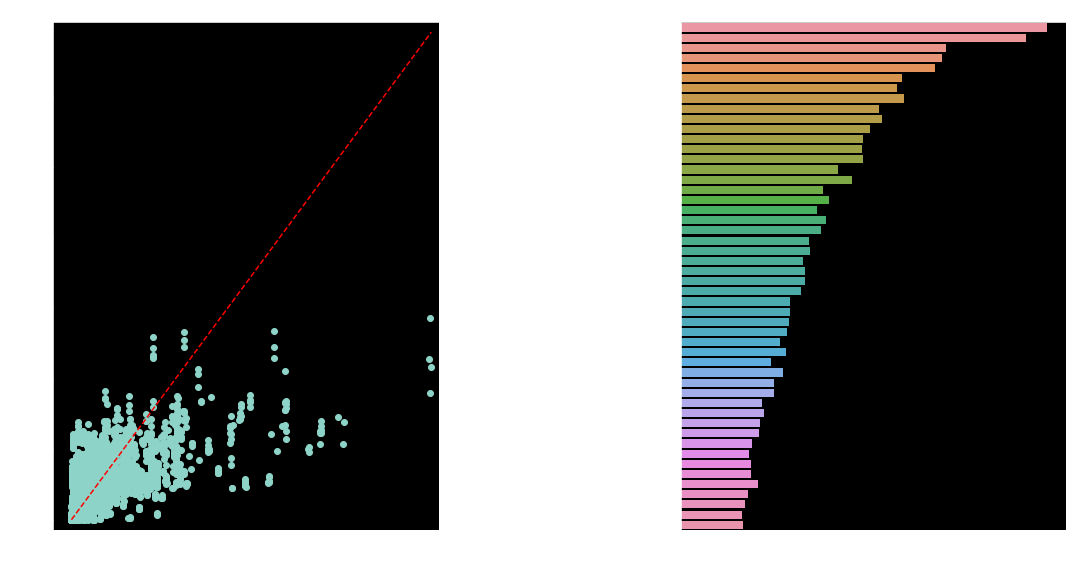

In [12]:
##### EVALUATION

fig = plt.figure(figsize = (15, 8))

# residual plot
plt.subplot(1, 2, 1)
plt.scatter(reals_oof.reshape(-1), preds_oof.reshape(-1))
axis_lim = np.max([reals_oof.max(), preds_oof.max()])
plt.ylim(top   = 1.02*axis_lim)
plt.xlim(right = 1.02*axis_lim)
plt.plot((0, axis_lim), (0, axis_lim), 'r--')
plt.title('Residual Plot')
plt.ylabel('Predicted demand')
plt.xlabel('Actual demand')

# feature importance
plt.subplot(1, 2, 2)
top_feats = 50
cols = importances[['Feature', 'Importance']].groupby('Feature').mean().sort_values(by = 'Importance', ascending = False)[0:top_feats].index
importance = importances.loc[importances.Feature.isin(cols)]
sns.barplot(x = 'Importance', y = 'Feature', data = importance.sort_values(by = 'Importance', ascending = False), ci = 0)
plt.title('Feature Importance')
plt.tight_layout()

# export
plt.savefig('../lgb_performance.pdf')

# SUBMISSION

In [13]:
##### LOGS

# model (RMSE, profit): description

# lgb_v1_df_v1  (102.49, -65.72%): lgb 17 features
# lgb_v2_df_v2  (78.08, 20.69%):   lgb 18 features
# lgb_v3_df_v3  (73.24, 20.22%):   lgb 18 features
# lgb_v4_df_v3  (73.37, 21.09%):   lgb 18 features, train_days = 101
# lgb_v5_df_v3  (72.82, 28.90%):   lgb 18 features, use asymmetric_mse as loss
# lgb_v6_df_v3  (72.75, 35.30%):   lgb 18 features, use simulationPrice as training weights
# lgb_v7_df_v3  (72.75, 35.66%):   lgb 18 features, use simulationPrice as train & eval weights
# lgb_v7_df_v4  (72.31, 36.61%):   lgb 23 features
# lgb_v8_df_v4  (75.33, 37.06%):   lgb 23 features, target transofrmation (squared root)
# lgb_v8_df_v5  (76.08, 36.18%):   lgb 31 features, new data set (additional features)
# lgb_v9_df_v5  (80.46, 30.95%):   lgb 23 features, train on positive cases only
# lgb_v9_df_v6  (58.72, 51.52%):   lgb 23 features, new data set (promo tweak)
# lgb_v9_df_v7  (63.49, 51.19%):   lgb 35 features, new data set (features on all orders/promos)
# lgb_v9_df_v8  (63.00, 52.05%):   lgb 35 features, new data set (features on manufacturer orders/promos)
# lgb_v10_df_v8 (62.03, 52.04%):   lgb 35 features, new data set (features on manufacturer orders/promos) RMSE loss
# lgb_v11_df_v8 (61.93, 52.95%):   lgb 35 features, new data set (features on manufacturer orders/promos) RMSE loss goss boosting
# lgb_v12_df_v8 (61.93, 52.95%):   lgb 35 features, new data set (features on manufacturer orders/promos)
#                                  RMSE loss goss boosting, 100 early stopping
# lgb_v12_df_v9  (61.51, 53.53%):  lgb 39 features, new data set with mean price ratios
# lgb_v12_df_v10 (61.62, 53.58%):  lgb 49 features, new data set with 1-day lag features

# lgb_v13_df_v11 (71.12, 52.47%):  lgb 62 features, new data set with fixed partitioning
# lgb_v14_df_v11 (70.69, 52.89%):  lgb 74 features, onclude back lagged features per all items (_all_)
# lgb_v15_df_v11 (70.69, 52.92%):  lgb 74 features, two-stage modeling (classifier => regressor)
# lgb_v16_df_v11 (69.80, 53.57%):  lgb 74 features, optimal params from hyperopt (100 trials)

# lgb_v17_df_v12 (69.86, 53.81%):  lgb 74 features, new data set
# lgb_v18_df_v12 (69.54, 53.87%):  lgb 62 features, optimal params for both classifier and regressor (100)
# lgb_v19_df_v12 (70.29, 53.39%):  lgb 62 features, optimal params for both classifier and regressor (1000)
# lgb_v20_df_v12 (69.54, 53.78%):  lgb 62 features, optimal params (100), one stage
# lgb_v21_df_v12 (70.19, 45.50%):  lgb 62 features, optimal params (100), one stage, no target transform
# lgb_v22_df_v12 (68.56, 54.03%):  lgb 77 features, default params
# lgb_v23_df_v12 (70.27, 52.94%):  lgb 77 features, default params, train on recent days (-50)
# lgb_v24_df_v12 (69.49, 54.12%):  lgb 77 features, asymmetric MSE obj
# lgb_v25_df_v12 (69.49, 54.22%):  lgb 77 features, asymmetric MSE obj and eval
# lgb_v25_df_v13 (69.67, 54.22%):  lgb 77 features, new data set
# lgb_v26_df_v14 (69.70, 54.16%):  lgb 476 features, new data set

In [14]:
##### SUBMISSION

# model name
name = 'lgb_v26_df_v14'
sub_name = name + '_profit_' + str(int(np.round(np.mean(oof_profit))))

# save OOF preds
oof = np.stack((preds_oof, reals_oof, prices_oof))
np.save('../oof_preds/' + sub_name + '.npy', oof)
print(oof.shape)

# save submissiion
sub = pd.read_csv('../submissions/sample_submission.csv', sep = '|')
sub['demandPrediction'] = postprocess_preds(preds_test)
sub.to_csv('../submissions/sub_' + sub_name + '.csv', sep = '|', index = False)
print(sub.shape)
sub.head()

(3, 7, 10463)
(10463, 2)


,itemID,demandPrediction
0,1,20
1,2,17
2,3,3
3,4,7
4,5,24


In [15]:
##### COMPARE WITH PREVIOUS SUBMISSIONS

# import old submission
best_name   = 'sub_lgb_v17_df_v11_profit_3941936.csv'
best        = pd.read_csv('../submissions/' + str(best_name), sep = '|')

# check correlation
best['sub'] = sub['demandPrediction']
print('- prediction orrelation: ' + str(best.corr()['sub']['demandPrediction']))
print('- old prediction mean:   ' + str(best['demandPrediction'].mean()))
print('- new prediction mean:   ' + str(best['sub'].mean()))

- prediction orrelation: 0.9799747092712723
- old prediction mean:   36.439357736786775
- new prediction mean:   37.6069960814298
